## Üç farklı linkage yöntemini kullanarak kalp hastalığı veri kümesi için dendrogramlar üretin: “mean”, “complete” ve “ward”. Sizce hangi bağlantı yöntemi daha iyi sonuç vermektedir?

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
X = df.drop('Outcome',axis=1).values
y = df['Outcome'].values

In [6]:
scaler = StandardScaler()
x_std = scaler.fit_transform(X)

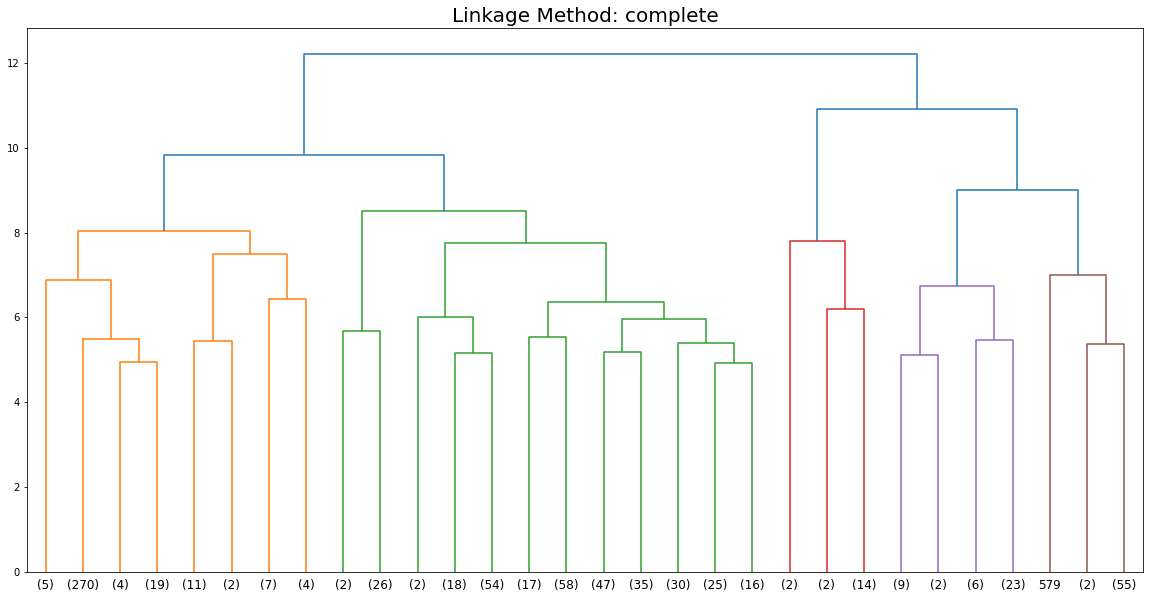

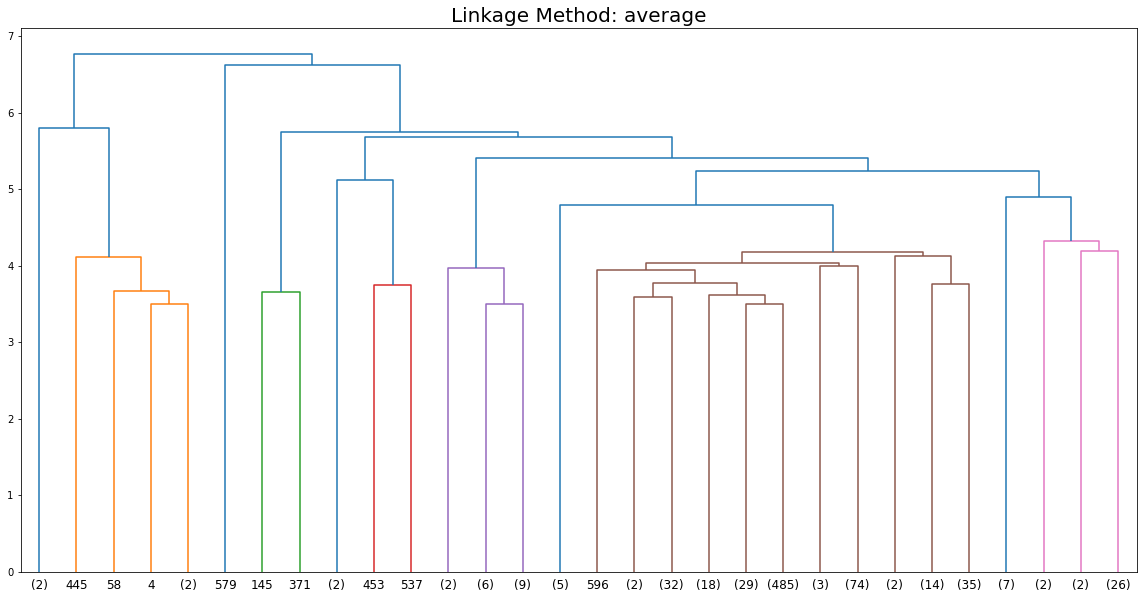

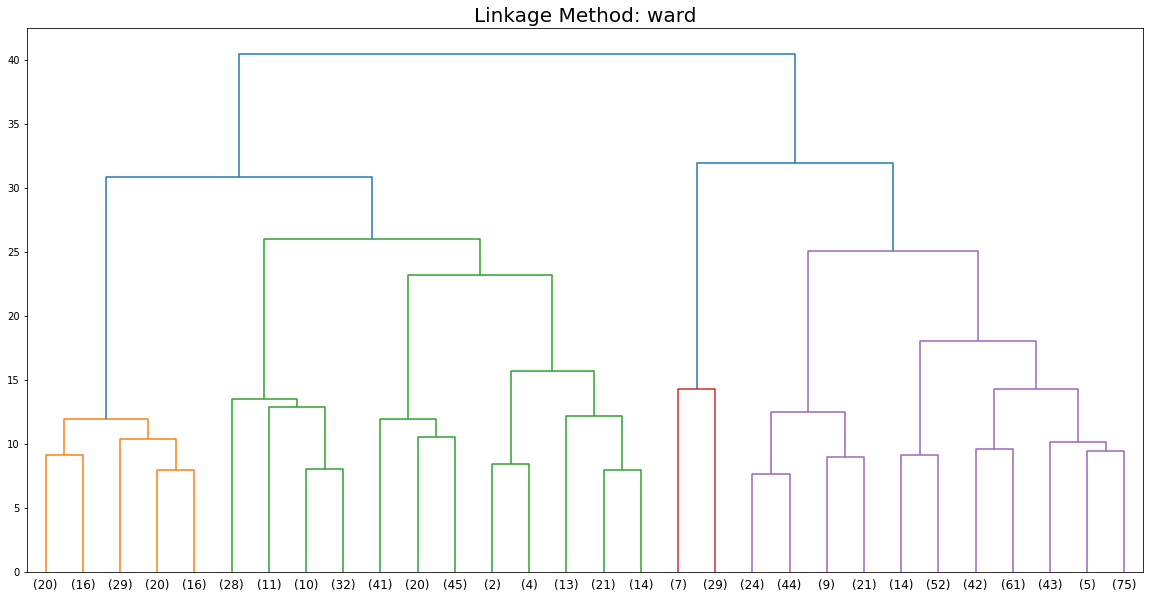

In [12]:
from scipy.cluster.hierarchy import dendrogram, linkage

linkage_methods = ["complete", "average", 
                   "ward"]
for method in linkage_methods:
    plt.figure(figsize=(20,10))
    plt.title(f"Linkage Method: {method}", size=20)
    Z = linkage(x_std, method=method)
    dendrogram(Z, truncate_mode="lastp", 
               leaf_font_size=12, leaf_rotation=0)
    plt.show()

Yorum: "ward" bağlantı yöntemi, aşırı değerler ile iyi bir şekilde baş ederek daha homojen bir kümeleme performansı sergilemiştir.



## n_clusters = 2 ayarını yaparak kalp hastalığı verilerine yığınsal kümeleme uygulayın. Yukarıdaki üç bağlantı yöntemini deneyin ve her bir çözümünüz için ARI ve siluet skorları elde edin. Sonuçları birbirleriyle ve önceki bölümde uyguladığınız k-ortalama çözümü ile karşılaştırın. Hangi algoritma ve ayar daha iyi performans gösterir?

In [32]:
from sklearn.cluster import AgglomerativeClustering
from sklearn import datasets, metrics
linkage_methods = ["complete","average", "ward"]
scores_df = pd.DataFrame(columns=["AR Score", "Silhouette Score","Linkage Method"])
for method in linkage_methods:          
    agg_model = AgglomerativeClustering(n_clusters=2,linkage=method)
    cluster_predict = agg_model.fit_predict(x_std)
    silhouette = metrics.silhouette_score(X=x_std, 
                                                labels=cluster_predict)
    ari_value = metrics.adjusted_rand_score(y, cluster_predict)
    scores_df = scores_df.append({"Silhouette Score":silhouette, 
                                          "AR Score":ari_value, 
                                          "Linkage Method":method},
                                         ignore_index=True
                                         )
    print(f"Silhouette score with '{method}' method: {silhouette:.3f}")
    print(f"Adjusted Rand score with '{method}' method: {ari_value:.3f}\n")

print("Remember that for k-means model,")
print(f"Silhouette score    : 0.196")
print(f"Adjusted Rand score : 0.114")


Silhouette score with 'complete' method: 0.191
Adjusted Rand score with 'complete' method: 0.052

Silhouette score with 'average' method: 0.444
Adjusted Rand score with 'average' method: 0.009

Silhouette score with 'ward' method: 0.157
Adjusted Rand score with 'ward' method: 0.102

Remember that for k-means model,
Silhouette score    : 0.196
Adjusted Rand score : 0.114


Average silhouette açısından daha iyi görünüyor